#Downloading data from the publication and setup the dataset

data doi ==> https://peerj.com/articles/4568/


In [ ]:
!wget https://ceb.nlm.nih.gov/proj/malaria/cell_images.zip

In [ ]:
!unzip cell_images.zip

In [1]:
!apt install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tree is already the newest version (1.7.0-5).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [2]:
# Show directory structure
!tree --dirsfirst --filelimit 10 /content/cell_images/

/content/cell_images/
├── Parasitized [13780 entries exceeds filelimit, not opening dir]
└── Uninfected [13780 entries exceeds filelimit, not opening dir]

2 directories, 0 files


# Import required modules


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [4]:
path ='/content/cell_images'  # path containing cell-images directory (both parasitized and infected)


In [5]:
img_width,img_height = 64,64  #Setting a common image height and width of 64,64 pixels
m = 27558 # total number of examples

In [6]:
datagen = ImageDataGenerator(rescale=1/255.0)  
#initailizing with a rescale value to get all pixel values in [0,1]

In [7]:
train_data_generator = datagen.flow_from_directory(directory=path, target_size=(img_width,img_height),
                                                    class_mode='binary',batch_size=m, subset = 'training')

Found 27558 images belonging to 2 classes.


In [8]:
x_data = train_data_generator[0][0] #obtain x-dataset as a tensor (27558,64,64,3)
m,width,height,dim = x_data.shape
x_flatten = x_data.reshape(x_data.shape[0],-1).T  # reshape x to (64*64*3 ,27558)

In [9]:
y_flatten = train_data_generator[0][1].reshape(1,m) 
#obtain y-dataset as a tensor and reshape to (1,27558)

In [10]:
print(x_flatten.shape, y_flatten.shape)  #printing shapes for confirmation

(12288, 27558) (1, 27558)


# Run PCA 

In [11]:
from sklearn.decomposition import PCA

## Two Dimensional Principal Component Analysis

### Normal PCA

In [12]:
percent_data = 0.7 # Here we choose the first 70% of data and perform PCA   

In [13]:
pca2d = PCA(n_components=2)
pca2d.fit(x_flatten[:,:int(percent_data*m)].T)
x_pca2d = pca2d.transform(x_flatten[:,:int(percent_data*m)].T)
y_pca2d = y_flatten[:,:int(percent_data*m)].T
print(f'Reduced X shape:{x_pca2d.shape} \nReduced Y shape:{y_pca2d.shape}')

Reduced X shape:(19290, 2) 
Reduced Y shape:(19290, 1)


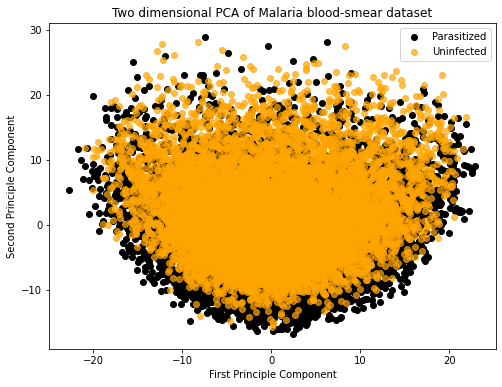

In [14]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.scatter(x_pca2d[:,0:1][y_pca2d==1],x_pca2d[:,1:2][y_pca2d==1],
           color='black',label='Parasitized')
ax.scatter(x_pca2d[:,0:1][y_pca2d==0],x_pca2d[:,1:2][y_pca2d==0],
           color='orange',label='Uninfected',alpha=0.7)
ax.set_xlabel('First Principle Component')
ax.set_ylabel('Second Principle Component')
ax.set_title('Two dimensional PCA of Malaria blood-smear dataset')
ax.legend()
plt.show()

### Random 2D PCA

Here we obtain 1000 (var : no_points) random training samples from the malaria dataset and visualize them on a 2D scatterplot

In [15]:
def get_random_points(start,end,no_points): 
    #obtaining random numbers between two given numbers
    a = np.arange(start,end,1)
    np.random.shuffle(a)
    a_reduced = a[:no_points]
    return a_reduced

In [16]:
no_points = 1000
n = get_random_points(start=0,end=m,no_points=no_points)

x_new_reduced = x_flatten.T[n]
y_new_reduced = y_flatten.T[n]

print(x_new_reduced.shape, y_new_reduced.shape)

(1000, 12288) (1000, 1)


In [17]:
pca2drand = PCA(n_components=2)
pca2drand.fit(x_new_reduced)
x_pca2drand = pca2d.transform(x_new_reduced)
y_pca2drand = y_new_reduced
print(f'Reduced X shape:{x_pca2drand.shape} \nReduced Y shape:{y_pca2drand.shape}')

Reduced X shape:(1000, 2) 
Reduced Y shape:(1000, 1)


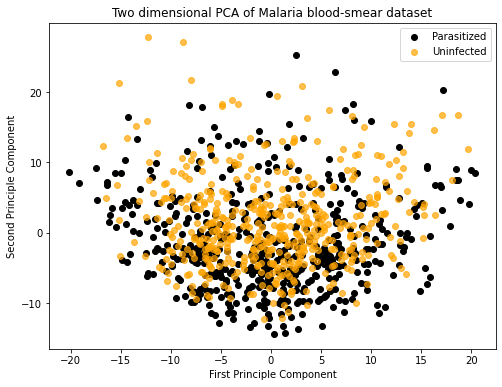

In [18]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.scatter(x_pca2drand[:,0:1][y_pca2drand==1],x_pca2drand[:,1:2][y_pca2drand==1],
           color='black',label='Parasitized')
ax.scatter(x_pca2drand[:,0:1][y_pca2drand==0],x_pca2drand[:,1:2][y_pca2drand==0],
           color='orange',label='Uninfected',alpha=0.7)
ax.set_xlabel('First Principle Component')
ax.set_ylabel('Second Principle Component')
ax.set_title('Two dimensional PCA of Malaria blood-smear dataset')
ax.legend()
plt.show()

## Three Dimensional Principal Component Analysis

### 3D PCA

In [19]:
percent_rep = 0.6  #show 60% of data

In [20]:
pca3d = PCA(n_components=3)
pca3d.fit(x_flatten[:,:int(percent_rep*m)].T) #m -- global variable == no of samples
x_pca3d = pca3d.transform(x_flatten[:,:int(percent_rep*m)].T)
y_pca3d = y_flatten[:,:int(percent_rep*m)].T
print(f'Reduced X shape:{x_pca3d.shape} \nReduced Y shape:{y_pca3d.shape}')


Reduced X shape:(16534, 3) 
Reduced Y shape:(16534, 1)


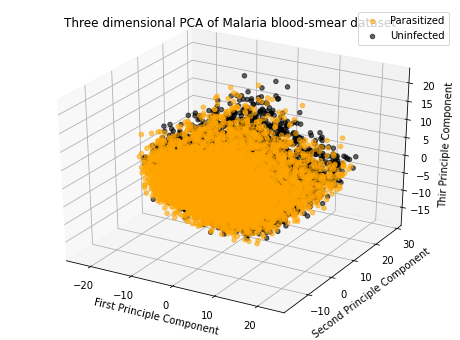

In [21]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pca3d[:,0:1][y_pca3d==1],x_pca3d[:,1:2][y_pca3d==1],
           x_pca3d[:,2:3][y_pca3d==1], label= 'Parasitized',color='orange',alpha=0.6)
ax.scatter(x_pca3d[:,0:1][y_pca3d==0],x_pca3d[:,1:2][y_pca3d==0],
           x_pca3d[:,2:3][y_pca3d==0], label= 'Uninfected',color='black',alpha=0.6)
ax.set_xlabel('First Principle Component')
ax.set_ylabel('Second Principle Component')
ax.set_zlabel('Thir Principle Component')
ax.set_title('Three dimensional PCA of Malaria blood-smear dataset')
ax.legend()

plt.show()


## Random 3D PCA

Here we obtain 1000 (var : no_points) random training samples from the malaria dataset and visualize them on a 3D scatterplot

In [22]:
no_points = 1000
n = get_random_points(start=0,end=m,no_points=no_points)


x_new_reduced = x_flatten.T[n]
y_new_reduced = y_flatten.T[n]

print(x_new_reduced.shape, y_new_reduced.shape)  
## contains 1000 random examples from the malaria image dataset

(1000, 12288) (1000, 1)


In [23]:
pca3drand = PCA(n_components=3)
pca3drand.fit(x_new_reduced)
x_pca3drand = pca3d.transform(x_new_reduced)
y_pca3drand = y_new_reduced
print(f'Reduced X shape:{x_pca3drand.shape} \nReduced Y shape:{y_pca3drand.shape}')

Reduced X shape:(1000, 3) 
Reduced Y shape:(1000, 1)


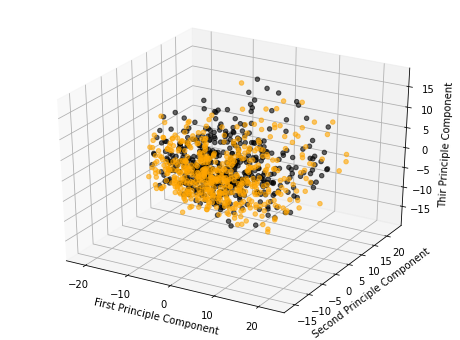

In [24]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pca3drand[:,0:1][y_pca3drand==1],x_pca3drand[:,1:2][y_pca3drand==1],
           x_pca3drand[:,2:3][y_pca3drand==1], label= 'Parasitized',color='orange',alpha=0.6)
ax.scatter(x_pca3drand[:,0:1][y_pca3drand==0],x_pca3drand[:,1:2][y_pca3drand==0],
           x_pca3drand[:,2:3][y_pca3drand==0], label= 'Uninfected',color='black',alpha=0.6)
ax.set_xlabel('First Principle Component')
ax.set_ylabel('Second Principle Component')
ax.set_zlabel('Thir Principle Component')

plt.show()

#Few Inferences



1.   PCA plot in 2D does not exhibit any clear, concise decision boundry between Uninfected and Parasitized images. However, it can be discerned that Images that are Parasitized are found on the lower rung of the scatterplot, signifying a lower value of PC2. Uninfected Images tend to have a higher value of PC2 and most of them were seen to be found on the upperside of the plot.
2.   PCA plot in 3D shows that Parasitized points always overlap the other class. This entails that from the given point-of-view the points belonging to the 'Parasitized' class lie closer to the viewer. Due to the inflexibility of viewing and regulating 3d scatterplots in Colab, this caveat could not be explored further and is a due for further EDA. 

